# Определение выгодного тарифа для телеком компании

## Этап 1. Получение данных

Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

Откроем файлы.

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

Напишем функцию, которая показывает первые 5 строк таблицы, показывает основную информацию и статистики, проверяет данные на мультиколлинеарность, показывает количество полных дубликатов.

In [3]:
def df_info(data):
    display(data.head())
    print(data.info())
    display(data.describe(include='all'))
    display(data.corr(method='spearman'))
    print('Количество дубликатов:', data.duplicated().sum())

Рассмотрим данные таблицы `calls`.

In [4]:
df_info(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
count,202607,202607,202607.000000,202607.000000
unique,202607,365,NaN,NaN
top,1439_370,2018-12-31,NaN,NaN
freq,1,1435,NaN,NaN
mean,NaN,NaN,6.755887,1253.940619
std,NaN,NaN,5.843365,144.722751
min,NaN,NaN,0.000000,1000.000000
25%,NaN,NaN,1.300000,1126.000000
50%,NaN,NaN,6.000000,1260.000000
75%,NaN,NaN,10.700000,1379.000000


,duration,user_id
duration,1.000000,0.000404
user_id,0.000404,1.000000


Количество дубликатов: 0


Всего в таблице 4 столбца.

Таблица `calls` содержит информацию о звонках:
`id` — уникальный номер звонка
`call_date` — дата звонка
`duration` — длительность звонка в минутах
`user_id` — идентификатор пользователя, сделавшего звонок.

Посмотрим распределение признака `duration`.

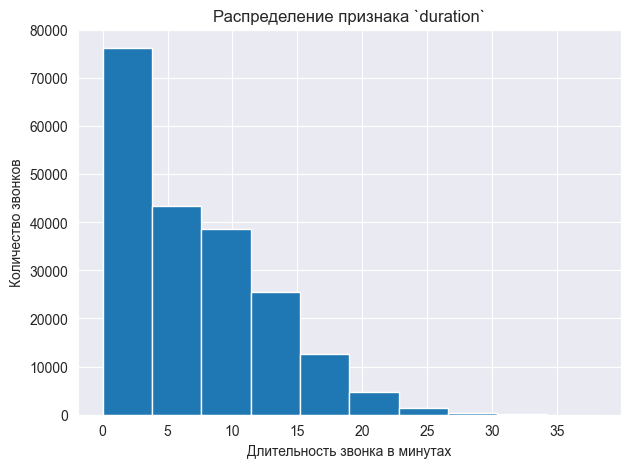

In [5]:
plt.figure(figsize=(7, 5))
calls['duration'].hist()
plt.title('Распределение признака `duration`')
plt.xlabel('Длительность звонка в минутах')
plt.ylabel('Количество звонков');

Минимальная длительность звонков - 0.0 минут, максимальная - 38.0 минут. Нулями обозначены пропущенные звонки, не будем их удалять. Большинство звонков длится от 1.3 до 10.7 минут. Наиболее часто клиенты общаются менее 5 минут.

Рассмотрим данные таблицы `internet`.

In [6]:
df_info(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
count,149396.000000,149396,149396.000000,149396,149396.000000
unique,NaN,149396,NaN,365,NaN
top,NaN,1052_84,NaN,2018-12-31,NaN
freq,NaN,1,NaN,1057,NaN
mean,74697.500000,NaN,370.192426,NaN,1252.099842
std,43127.054745,NaN,278.300951,NaN,144.050823
min,0.000000,NaN,0.000000,NaN,1000.000000
25%,37348.750000,NaN,138.187500,NaN,1130.000000
50%,74697.500000,NaN,348.015000,NaN,1251.000000
75%,112046.250000,NaN,559.552500,NaN,1380.000000


,Unnamed: 0,mb_used,user_id
Unnamed: 0,1.000000,0.02501,0.999995
mb_used,0.025010,1.00000,0.025010
user_id,0.999995,0.02501,1.000000


Количество дубликатов: 0


Всего в таблице 5 столбцов.

Таблица `internet` содержит информацию об интернет-сессиях:
`id` — уникальный номер сессии
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
`session_date` — дата интернет-сессии
`user_id` — идентификатор пользователя.

Столбец `Unnamed: 0` дублирует индексы таблицы и будет удален далее.

Посмотрим распределение признака `mb_used`.

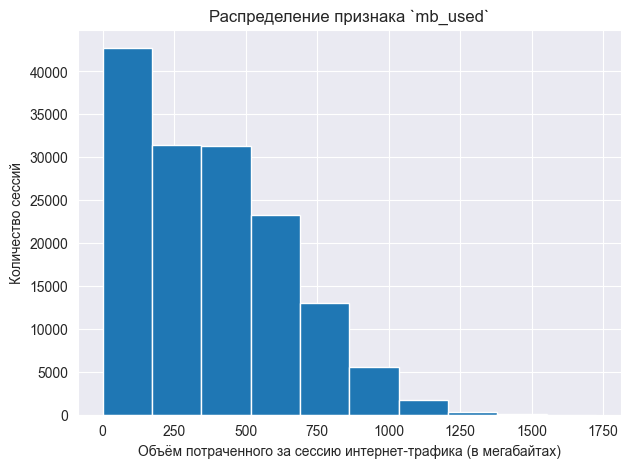

In [7]:
plt.figure(figsize=(7, 5))
internet['mb_used'].hist()
plt.title('Распределение признака `mb_used`')
plt.xlabel('Объём потраченного за сессию интернет-трафика (в мегабайтах)')
plt.ylabel('Количество сессий');

Минимальный объем потраченного за сессию интернет-трафика - 0.0 мб, максимальный - 1724.83 мб. Большинство клиентов расходуют от 138 до 559 мб за одну сессию. В основном, клиенты расходуют менее 250 мб.

Рассмотрим данные таблицы `messages`.

In [8]:
df_info(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
count,123036,123036,123036.000000
unique,123036,364,NaN
top,1052_84,2018-12-31,NaN
freq,1,859,NaN
mean,NaN,NaN,1256.989410
std,NaN,NaN,143.523967
min,NaN,NaN,1000.000000
25%,NaN,NaN,1134.000000
50%,NaN,NaN,1271.000000
75%,NaN,NaN,1381.000000


,user_id
user_id,1.0


Количество дубликатов: 0


Всего в таблице 3 столбца.

Таблица `messages` содержит информацию о сообщениях:
`id` — уникальный номер звонка
`message_date` — дата сообщения
`user_id` — идентификатор пользователя, отправившего сообщение.

Рассмотрим данные таблицы `tariffs`.

In [9]:
df_info(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,smart
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214,NaN
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000,NaN
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000,NaN
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000,NaN
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000,NaN


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
messages_included,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
mb_per_month_included,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
minutes_included,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
rub_monthly_fee,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
rub_per_gb,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
rub_per_message,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
rub_per_minute,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


Количество дубликатов: 0


Всего в таблице 8 столбцов и 2 строки.

Таблица `tariffs` содержит информацию об интернет-сессиях:
`tariff_name` — название тарифа
`rub_monthly_fee` — ежемесячная абонентская плата в рублях
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

Рассмотрим данные таблицы `users`.

In [10]:
df_info(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
count,500.000000,500.00000,38,500,500,500,500,500
unique,NaN,NaN,33,76,246,419,270,2
top,NaN,NaN,2018-12-09,Москва,Радим,Андреенко,2018-05-28,smart
freq,NaN,NaN,2,99,6,5,8,351
mean,1249.500000,46.58800,NaN,NaN,NaN,NaN,NaN,NaN
std,144.481833,16.66763,NaN,NaN,NaN,NaN,NaN,NaN
min,1000.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1124.750000,32.00000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1249.500000,46.00000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1374.250000,62.00000,NaN,NaN,NaN,NaN,NaN,NaN


,user_id,age
user_id,1.000000,-0.032321
age,-0.032321,1.000000


Количество дубликатов: 0


Всего в таблице 5 столбцов.

Таблица `users` содержит информацию о пользователях:
`user_id` — уникальный идентификатор пользователя
`first_name` — имя пользователя
`last_name` — фамилия пользователя
`age` — возраст пользователя (годы)
`reg_date` — дата подключения тарифа (день, месяц, год)
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, значит, тариф ещё действовал на момент выгрузки данных)
`city` — город проживания пользователя
`tarif` — название тарифного плана

В столбце `churn_date` много пропущенных значений. Исходя из предоставленных данных, пропуски обозначают, что тариф ещё действовал на момент выгрузки данных.

### Вывод

Первое представление о данных получено. Можно сделать следующие выводы:

- Необходимо изменить тип данных некоторых столбцов. 
- Пропуски присутствуют лишь в таблице `users` в столбце `churn_date`.

## Этап 2. Предобработка данных

### Изменение типов данных

Изменим тип данных следующих столбцов на `datetime`:
- `call_date` из таблицы `calls`
- `session_date` из таблицы `internet`
- `message_date` из таблицы `messages`
- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

Округлим значения столбца `duration` датафрейма `calls` вверх с помощью метода `ceil()` и приведем столбец к типу `int`. 

In [12]:
calls['duration'] = np.ceil(calls['duration']).astype(dtype = 'int')

Удалим столбец `Unnamed: 0` из датафрейма `internet`.

In [13]:
internet = internet.drop('Unnamed: 0', axis=1)

### Добавление новых столбцов

Создадим новые столбцы:
- столбец `month` в датафрейме `calls` с номером месяца из столбца `call_date`.
- столбец `month` в датафрейме `messages` с номером месяца из столбца `message_date`.
- `month` в датафрейме `internet` с номером месяца из столбца `session_date`.

In [14]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month 
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 

Посчитаем количество сделанных звонков разговора для каждого пользователя по месяцам и сохраним в переменную `calls_per_month`. 

In [15]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
calls_per_month.head(30)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63
1002    6         15
        7         26
        8         42
        9         36
        10        33
        11        32
        12        33
1003    8         55
        9        134
        10       108
        11       115
        12       108
1004    5          9
        6         31
        7         22
        8         19
        9         26
        10        29
        11        19
        12        21

Посчитаем количество израсходованных минут разговора для каждого пользователя по месяцам и сохраним в переменную `minutes_per_month`. 

In [16]:
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
minutes_per_month.head(30)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414
1002    6          117
        7          214
        8          289
        9          206
        10         212
        11         243
        12         236
1003    8          380
        9          961
        10         855
        11         824
        12         802
1004    5           35
        6          171
        7          135
        8          137
        9          117
        10         145
        11         117
        12         130

Посчитаем количество отправленных сообщений по месяцам для каждого пользователя и сохраним в переменную `messages_per_month`.

In [17]:
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
messages_per_month.head(30)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11
        8            13
        9             4
        10           10
        11           16
        12           12
1003    8            37
        9            91
        10           83
        11           94
        12           75
1004    5            95
        6           134
        7           181
        8           151
        9           146
        10          165
        11          158
        12          162
1005    1             7
        2            38

Посчитаем количество потраченных мегабайт по месяцам для каждого пользователя и сохраним в переменную `sessions_per_month`.

In [18]:
sessions_per_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
sessions_per_month.head(30)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66
1002    6      10856.82
        7      17580.10
        8      20319.26
        9      16691.08
        10     13888.25
        11     18587.28
        12     18113.73
1003    8       8565.21
        9      12468.87
        10     14768.14
        11     11356.89
        12     10121.53
1004    5      13403.98
        6      17600.02
        7      22229.58
        8      28584.37
        9      15109.03
        10     18475.44
        11     15616.02
        12     18021.04

## Этап 3. Исследовательский анализ данных и подсчёт выручки

Посмотрим, какой процент клиентов расторгли договор.

In [19]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

Расторгли договор 7.6% клиентов из датасета.

Объединяем все посчитанные выше значения в один датафрейм `user_behavior`.

Для каждой пары `пользователь - месяц` будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах.

In [20]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Проверим пропуски в таблице `user_behavior` после объединения:

In [21]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Заполним образовавшиеся пропуски в данных нулями.

In [22]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Убедимся, что пропуски заполнены.

In [23]:
user_behavior.isna().sum()

user_id          0
month            0
calls            0
messages         0
mb_used          0
minutes          0
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

Добавим информацию о тарифах.

In [24]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
user_behavior = user_behavior.merge(tariffs, on='tariff')

Добавим столбцы с количеством минут разговора, сообщений и мегабайт, превышающих включенные в тариф.

In [25]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

Переведем превышающие тариф мегабайты в гигабайты и сохраним в столбец `paid_gb`

In [26]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Добавим столбцы с выручкой за минуты разговора, сообщения и интернет.

In [27]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

Добавим столбец `total_cost` с помесячной выручкой с каждого пользователя.

In [28]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

Создадим датафрейм `stats_df`, который будет хранить основные характеристики для каждой пары "месяц-тариф".

In [29]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],
            values=['calls', 'minutes', 'messages', 'mb_used'],
            aggfunc=['mean', 'std', 'median']
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 
                  'minutes_mean', 'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                  'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


### Распределение среднего количества звонков по видам тарифов и месяцам.

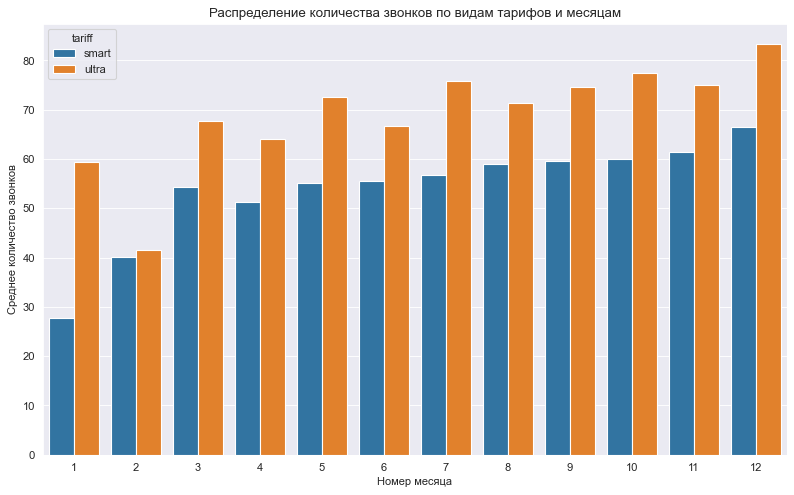

In [30]:
plt.figure(figsize=(12, 7), dpi=80)
sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df)

plt.title('Распределение количества звонков по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Среднее количество звонков');

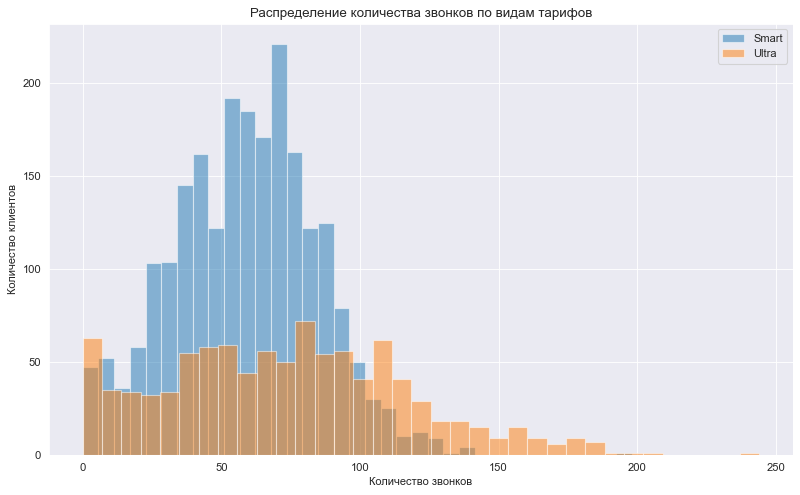

In [31]:
plt.figure(figsize=(12, 7), dpi=80)
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества звонков по видам тарифов')
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов');

Среднее количество звонков у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. В течение года пользователи обоих тарифов увеличивают количество своих звонков. Рост среднего количества звонков у абонентов тарифа `Smart` равномерный в течение года. Пользователи тарифа `Ultra` не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов тарифа `Ultra` наблюдались самые низкие показатели, у абонентов тарифа `Smart` самые низкие показатели наблюдись в январе.

### Распределение средней продолжительности звонков по видам тарифов и месяцам

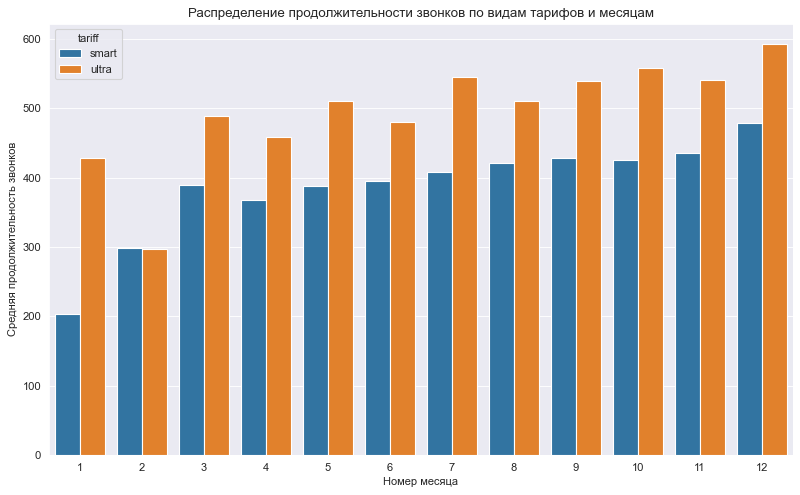

In [32]:
plt.figure(figsize=(12, 7), dpi=80)
sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df)

plt.title('Распределение продолжительности звонков по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Средняя продолжительность звонков');

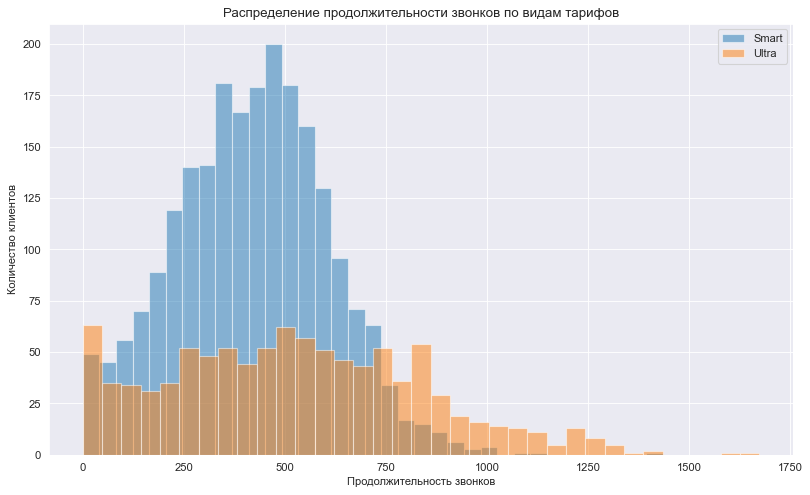

In [33]:
plt.figure(figsize=(12, 7), dpi=80)
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение продолжительности звонков по видам тарифов')
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество клиентов');

Средняя длительность разговоров у абонентов тарифа `Ultra` больше, чем у абонентов тарифа `Smart`. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа `Smart` равномерный в течение года. Пользователи тарифа `Ultra` не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов тарифа `Ultra` наблюдались самые низкие показатели, у абонентов тарифа `Smart` самые низкие показатели наблюдись в январе.

### Распределение среднего количества сообщений по видам тарифов и месяцам

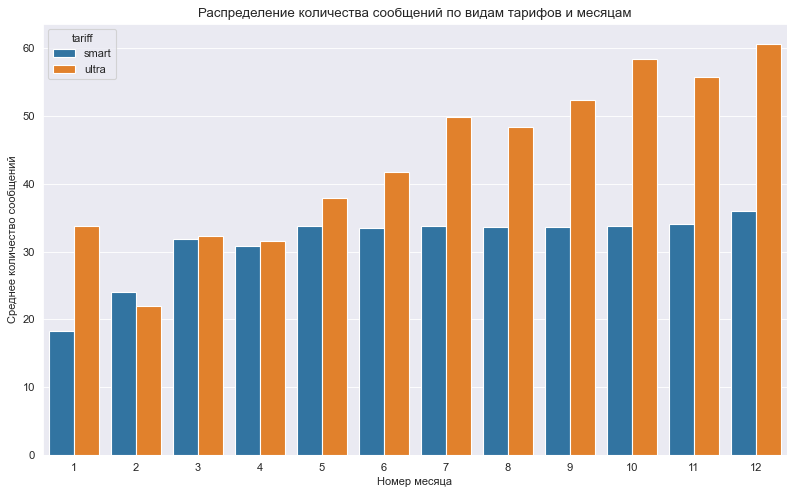

In [34]:
plt.figure(figsize=(12, 7), dpi=80)
sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df)

plt.title('Распределение количества сообщений по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Среднее количество сообщений');

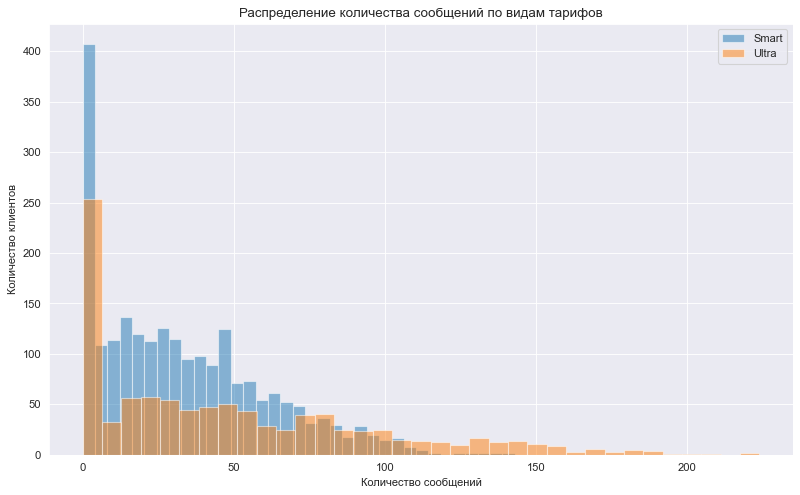

In [35]:
plt.figure(figsize=(12, 7), dpi=80)
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5);
plt.legend(['Smart', 'Ultra'])
plt.title('Распределение количества сообщений по видам тарифов')
plt.xlabel('Количество сообщений')
plt.ylabel('Количество клиентов');

В среднем пользователи тарифа `Ultra` отправляют больше сообщений, чем пользователи тарифа `Smart`. Количество сообщений в течение года на обоих тарифах растет. В феврале абоненты тарифа `Ultra` отправляют меньше всего сообщений, у абонентов тарифа `Smart` самые низкие показатели наблюдись в январе. Абоненты тарифа `Smart` отпарвляют меньше всего сообщений в январе, а с марта по декабрь примерно одинаковое количество сообщений.

### Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам

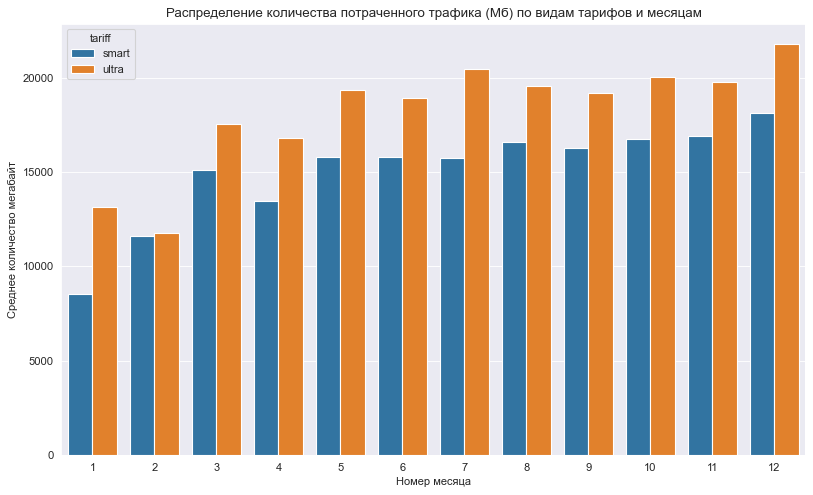

In [36]:
plt.figure(figsize=(12, 7), dpi=80)
sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df)

plt.title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Среднее количество мегабайт');

Сравнение потраченных мегабайт среди пользователей тарифов `Smart` и `Ultra`.

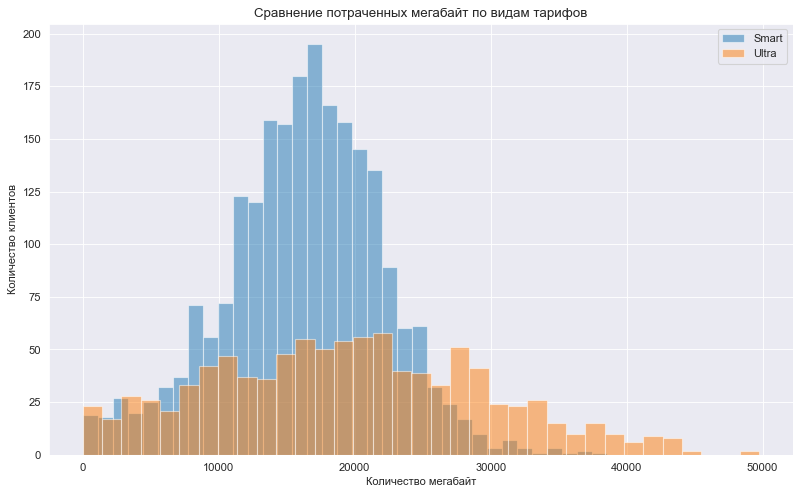

In [37]:
plt.figure(figsize=(12, 7), dpi=80)
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5)
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5);
plt.legend(['Smart', 'Ultra'])
plt.title('Сравнение потраченных мегабайт по видам тарифов')
plt.xlabel('Количество мегабайт')
plt.ylabel('Количество клиентов');

Меньше всего пользователи использовали интернет в январе, феврале и апреле. Чаще всего абоненты тарифа `Smart` тратят 15-17 Гб, а абоненты тарифного плана `Ultra` - 19-21 ГБ.

## Этап 4. Проверка гипотез

### Проверка гипотезы: средняя выручка пользователей тарифов «Ultra» и «Smart» различаются.

- H_0: Выручка (`total_cost`) пользователей `Ultra` = выручка (`total_cost`) пользователей `Smart`
- H_a: Выручка (`total_cost`) пользователей `Ultra` ≠ выручка (`total_cost`) пользователей `Smart`
- alpha = 0.05

In [38]:
results = st.ttest_ind(
    user_behavior.loc[user_behavior['tariff'] =='ultra']['total_cost'], 
    user_behavior.loc[user_behavior['tariff'] =='smart']['total_cost'], 
    equal_var = False
)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Проверка гипотезы: пользователи из Москвы приносят больше выручки, чем пользователи из других городов.

- H_0: Выручка (`total_cost`) пользователей из Москвы = выручка (`total_cost`) пользователей не из Москвы`
- H_1: Выручка (`total_cost`) пользователей из Москвы ≠ выручка (`total_cost`) пользователей не из Москвы`
- alpha = 0.05

In [39]:
results = st.ttest_ind(
    user_behavior.loc[(user_behavior['city'] =='Москва')]['total_cost'], 
    user_behavior.loc[ ~(user_behavior['city'] =='Москва')]['total_cost'], 
    equal_var = False
)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу
